<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Individual_Project/Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Project - Deliverable #2
## Ken Noppinger

Source from Gitbhub for Johns Hopkins Resource Center: 

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-23-2020.csv

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly

#### Fix '''pandas''' and '''pandas_profiling''' versions

In [2]:
print("pandas version:\t", pd.__version__)

pandas version:	 1.1.3


In [3]:
# Issue with pandas profiling
# Upgrade both pandas and pandas_profiling packages solve the problem

!pip install pandas pandas_profiling --upgrade

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.3)
Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


#### Install ```plotly``` package

In [4]:
!pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


# Part I - Data Loading, Cleaning, and Merging 

## 1 - Read COVID-19 Daily Report

In [5]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-23-2020.csv

--2020-10-25 02:11:09--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-23-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555600 (543K) [text/plain]
Saving to: ‘10-23-2020.csv.5’

10-23-2020.csv.5    100%[===================>] 542.58K  --.-KB/s    in 0.04s   

2020-10-25 02:11:10 (12.6 MB/s) - ‘10-23-2020.csv.5’ saved [555600/555600]



In [6]:
covid_df = pd.read_csv("10-23-2020.csv")
covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-24 04:24:46,33.93911,67.709953,40687,1507,34010,5170.0,Afghanistan,104.517683,3.703886
1,NaN,NaN,NaN,Albania,2020-10-24 04:24:46,41.15330,20.168300,18556,469,10466,7621.0,Albania,644.798110,2.527484
2,NaN,NaN,NaN,Algeria,2020-10-24 04:24:46,28.03390,1.659600,55630,1897,38788,14945.0,Algeria,126.861293,3.410031
3,NaN,NaN,NaN,Andorra,2020-10-24 04:24:46,42.50630,1.521800,4038,69,2729,1240.0,Andorra,5226.169676,1.708767
4,NaN,NaN,NaN,Angola,2020-10-24 04:24:46,-11.20270,17.873900,8829,265,3384,5180.0,Angola,26.863409,3.001472


In [7]:
covid_df.shape

(3958, 14)

### 1.1 - Cleanup Columns

In [8]:
covid_df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

Rename the following columns: Admin2 and Combined_Key

In [9]:
covid_df.rename(columns = {'Admin2':'County', 'Combined_Key':'Place'}, inplace = True)

Remove columns that irrelevant to the study

In [10]:
irrelevant_columns = ['Last_Update', 'Lat', 'Long_', 'Recovered', 'Active']
covid_df = covid_df.drop(irrelevant_columns, axis=1)
covid_df.head(3)

,FIPS,County,Province_State,Country_Region,Confirmed,Deaths,Place,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,40687,1507,Afghanistan,104.517683,3.703886
1,NaN,NaN,NaN,Albania,18556,469,Albania,644.798110,2.527484
2,NaN,NaN,NaN,Algeria,55630,1897,Algeria,126.861293,3.410031


Reorder columns

In [11]:
column_order = ['FIPS','County','Province_State','Country_Region','Place','Confirmed','Deaths','Incidence_Rate','Case-Fatality_Ratio'] 
covid_df = covid_df[column_order] 
covid_df.head(3) 

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,Afghanistan,40687,1507,104.517683,3.703886
1,NaN,NaN,NaN,Albania,Albania,18556,469,644.798110,2.527484
2,NaN,NaN,NaN,Algeria,Algeria,55630,1897,126.861293,3.410031


In [12]:
covid_df.shape

(3958, 9)

### 1.2 - Remove Irrelevant Data

Drop any duplicate rows.

In [13]:
covid_df = covid_df.drop_duplicates()
covid_df.shape

(3958, 9)

Determine how much of the dataframe is useful for the study.

In [14]:
covid_df["Country_Region"].value_counts().head(10)

US          3272
Russia        83
Japan         49
India         37
Colombia      34
China         33
Mexico        32
Brazil        27
Ukraine       27
Peru          26
Name: Country_Region, dtype: int64

Note: Non-US data is irrelvant since only US counties are being studied.

Only keep the records representing US data.

In [15]:
covid_us_df = covid_df[covid_df.Country_Region == "US"]
covid_us_df.shape

(3272, 9)

Check Data Types and Counts

In [16]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3957
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3261 non-null   float64
 1   County               3266 non-null   object 
 2   Province_State       3789 non-null   object 
 3   Country_Region       3958 non-null   object 
 4   Place                3958 non-null   object 
 5   Confirmed            3958 non-null   int64  
 6   Deaths               3958 non-null   int64  
 7   Incidence_Rate       3877 non-null   float64
 8   Case-Fatality_Ratio  3916 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 309.2+ KB


The Non-Null counts are not the same, so cleanup missing data before moving forward.

### 1.3 - Missing Data Cleanup

Visualize the dataframe to identify missing data

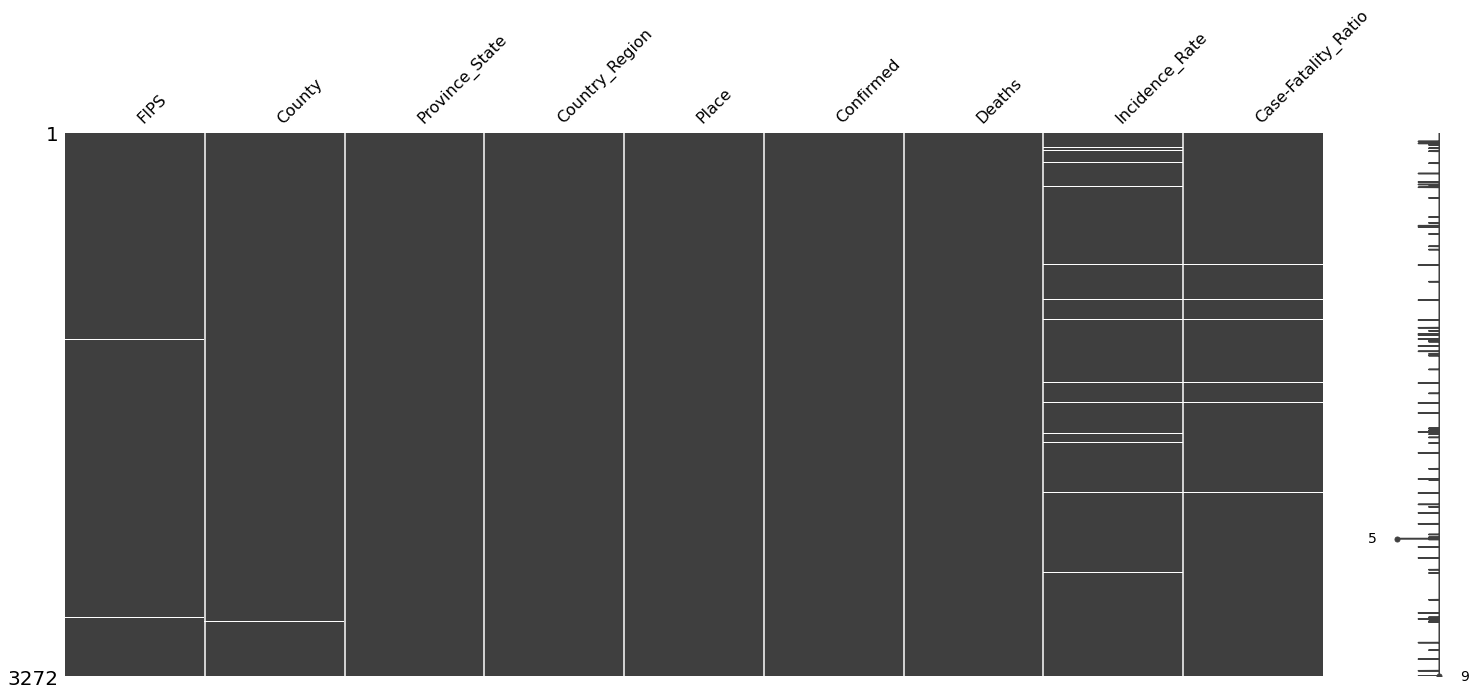

In [17]:
# Reference: https://analyticsindiamag.com/tutorial-on-missingno-python-tool-to-visualize-missing-values/
import missingno as msno
msno.matrix(covid_us_df)

Investigate records without a FIPS code

In [18]:
covid_nofips_us_df = covid_us_df[covid_us_df.FIPS.isna()]
covid_nofips_us_df.shape

(11, 9)

In [19]:
covid_nofips_us_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
1881,NaN,Dukes and Nantucket,Massachusetts,US,"Dukes and Nantucket, Massachusetts, US",213,2,741.359507,0.938967
1916,NaN,Federal Correctional Institution (FCI),Michigan,US,"Federal Correctional Institution (FCI), Michig...",197,5,NaN,2.538071
1948,NaN,Michigan Department of Corrections (MDOC),Michigan,US,"Michigan Department of Corrections (MDOC), Mic...",6459,75,NaN,1.161170
2201,NaN,Kansas City,Missouri,US,"Kansas City, Missouri, US",13989,184,2861.069695,1.315319
3075,NaN,NaN,Recovered,US,"Recovered, US",0,0,NaN,NaN
3548,NaN,Bear River,Utah,US,"Bear River, Utah, US",4867,15,2605.209348,0.308198
3549,NaN,Central Utah,Utah,US,"Central Utah, Utah, US",1176,7,1434.951314,0.595238
3553,NaN,Southeast Utah,Utah,US,"Southeast Utah, Utah, US",422,3,1048.994506,0.710900
3554,NaN,Southwest Utah,Utah,US,"Southwest Utah, Utah, US",5705,49,2263.511637,0.858896
3557,NaN,TriCounty,Utah,US,"TriCounty, Utah, US",384,2,678.181626,0.520833


Records lacking a FIPS code cannot be used in the study because the field will be joined with land area data needed to determine population density for each county.

Remove the records without a FIPS code.

In [20]:
covid_us_df = covid_us_df[covid_us_df.FIPS.notna()]
covid_us_df.shape

(3261, 9)

Investigate records without a County

In [21]:
covid_no_county_us_df = covid_us_df[covid_us_df.County.isna()]
covid_no_county_us_df.shape

(5, 9)

In [22]:
covid_no_county_us_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
961,88888.0,NaN,Diamond Princess,US,"Diamond Princess, US",49,0,NaN,0.000000
1192,99999.0,NaN,Grand Princess,US,"Grand Princess, US",103,3,NaN,2.912621
1193,66.0,NaN,Guam,US,"Guam, US",4141,69,2521.479154,1.666264
2721,69.0,NaN,Northern Mariana Islands,US,"Northern Mariana Islands, US",88,2,159.582185,2.272727
3577,78.0,NaN,Virgin Islands,US,"Virgin Islands, US",1346,21,1254.801059,1.560178


These records represent provinces or special COVID groupings irrelevant to the study and can be removed.

In [23]:
covid_us_df = covid_us_df[covid_us_df.County.notna()]
covid_us_df.shape

(3256, 9)

In [24]:
covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 633 to 3904
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3256 non-null   float64
 1   County               3256 non-null   object 
 2   Province_State       3256 non-null   object 
 3   Country_Region       3256 non-null   object 
 4   Place                3256 non-null   object 
 5   Confirmed            3256 non-null   int64  
 6   Deaths               3256 non-null   int64  
 7   Incidence_Rate       3194 non-null   float64
 8   Case-Fatality_Ratio  3222 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 254.4+ KB


There are still NaNs in the following filed not critical to the study: Lat, Long_, Active, Incidence_Rate, Case-Fatality_Ratio.

Set these NaNs to a value of zero.

In [25]:
covid_us_df = covid_us_df.fillna({'Lat':0, 'Long_':0, 'Active':0, 'Incidence_Rate':0, 'Case-Fatality_Ratio':0})
covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 633 to 3904
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3256 non-null   float64
 1   County               3256 non-null   object 
 2   Province_State       3256 non-null   object 
 3   Country_Region       3256 non-null   object 
 4   Place                3256 non-null   object 
 5   Confirmed            3256 non-null   int64  
 6   Deaths               3256 non-null   int64  
 7   Incidence_Rate       3256 non-null   float64
 8   Case-Fatality_Ratio  3256 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 254.4+ KB


All NaNs addressed.  Check column statistics to identify any other missing data

In [26]:
covid_us_df.describe(include='all')

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
count,3256.000000,3256,3256,3256,3256,3256.000000,3256.000000,3256.000000,3256.000000
unique,NaN,1911,52,1,3256,NaN,NaN,NaN,NaN
top,NaN,Unassigned,Texas,US,"Ouachita, Arkansas, US",NaN,NaN,NaN,NaN
freq,NaN,51,255,3256,1,NaN,NaN,NaN,NaN
mean,32367.711302,NaN,NaN,NaN,NaN,2594.035319,68.644042,2453.996859,2.078430
std,17894.506633,NaN,NaN,NaN,NaN,9952.812883,331.431406,1650.282530,3.274205
min,1001.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,19054.500000,NaN,NaN,NaN,NaN,199.000000,2.000000,1308.989333,0.702929
50%,30068.000000,NaN,NaN,NaN,NaN,562.000000,9.000000,2169.107812,1.531170
75%,47035.500000,NaN,NaN,NaN,NaN,1596.500000,32.000000,3263.993947,2.708753


Note "Unassigned" is the most frequent value in the "admin2" column, which represents a county.  

This field should not be unassigned and needs to be investigated.

In [27]:
unassigned_df = covid_us_df[covid_us_df.County == "Unassigned"] 
unassigned_df.shape

(51, 9)

In [28]:
unassigned_df.sample(10)

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
1890,90025.0,Unassigned,Massachusetts,US,"Unassigned, Massachusetts, US",3693,5,0.0,0.135391
2466,90034.0,Unassigned,New Jersey,US,"Unassigned, New Jersey, US",432,0,0.0,0.000000
3573,90050.0,Unassigned,Vermont,US,"Unassigned, Vermont, US",8,0,0.0,0.000000
3125,90045.0,Unassigned,South Carolina,US,"Unassigned, South Carolina, US",0,0,0.0,0.000000
1640,90020.0,Unassigned,Kansas,US,"Unassigned, Kansas, US",0,0,0.0,0.000000
1175,90013.0,Unassigned,Georgia,US,"Unassigned, Georgia, US",1947,5,0.0,0.256805
1760,90021.0,Unassigned,Kentucky,US,"Unassigned, Kentucky, US",0,0,0.0,0.000000
3746,90053.0,Unassigned,Washington,US,"Unassigned, Washington, US",374,3,0.0,0.802139
1025,90012.0,Unassigned,Florida,US,"Unassigned, Florida, US",1853,0,0.0,0.000000
3191,90046.0,Unassigned,South Dakota,US,"Unassigned, South Dakota, US",0,0,0.0,0.000000


Records with county field value of "Unassigned" represent states.

The study is looking at county-level population denisty, so state records are irrelevant and can be removed.

Remove the records with the county "Unassigned".

In [29]:
covid_counties_df = covid_us_df[covid_us_df.County != "Unassigned"]
covid_counties_df.shape

(3205, 9)

### 1.4 - Verify Data Types

In [30]:
covid_counties_df.dtypes

FIPS                   float64
County                  object
Province_State          object
Country_Region          object
Place                   object
Confirmed                int64
Deaths                   int64
Incidence_Rate         float64
Case-Fatality_Ratio    float64
dtype: object

FIPS code was read in as float because there were NaNs and that is a float type.

FIPS should be integer, so recast the column from float64 to int

Reference: https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy

In [31]:
covid_counties_df = covid_counties_df.assign(FIPS=lambda x: x['FIPS'].astype(int))

In [32]:
covid_counties_df.sample(5)

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
1114,13169,Jones,Georgia,US,"Jones, Georgia, US",638,15,2220.288846,2.351097
2279,30025,Fallon,Montana,US,"Fallon, Montana, US",47,0,1651.440618,0.000000
2597,37063,Durham,North Carolina,US,"Durham, North Carolina, US",8745,99,2720.163739,1.132075
3335,48085,Collin,Texas,US,"Collin, Texas, US",17248,174,1666.908276,1.008813
2760,39077,Huron,Ohio,US,"Huron, Ohio, US",716,14,1228.847012,1.955307


Number of Provinces/States

In [33]:
covid_counties_df.Province_State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [34]:
num_provinces_states = len(covid_counties_df.Province_State.unique())
num_provinces_states

52

Note that Puerto Rico and Washington, DC are included in the study.

### 1.5 - Pandas Profile Report

In [35]:
type(covid_counties_df)

pandas.core.frame.DataFrame

In [36]:
prof = ProfileReport(covid_counties_df, minimal=True)
prof.to_file(output_file="covid19_daily_report.html")
prof

## 2 - Read Population Data

In [37]:
!wget https://www.ers.usda.gov/webdocs/DataFiles/48747/PopulationEstimates.xls

--2020-10-25 02:11:14--  https://www.ers.usda.gov/webdocs/DataFiles/48747/PopulationEstimates.xls
Resolving www.ers.usda.gov (www.ers.usda.gov)... 13.72.9.120
Connecting to www.ers.usda.gov (www.ers.usda.gov)|13.72.9.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5619712 (5.4M) [application/vnd.ms-excel]
Saving to: ‘PopulationEstimates.xls.4’

PopulationEstimates 100%[===================>]   5.36M  4.50MB/s    in 1.2s    

2020-10-25 02:11:16 (4.50 MB/s) - ‘PopulationEstimates.xls.4’ saved [5619712/5619712]



In [38]:
pop_df = pd.read_excel("PopulationEstimates.xls")
pop_df.head()

,"Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164
0,These data were posted to the ERS website (at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,...,R_death_2016,R_death_2017,R_death_2018,R_death_2019,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
2,00000,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,563561,2235208,2274116,2162725,2307293,2334155,2306148,2044228,1701962,1552022,987836,3973485,3936976,3940576,3963195,3992376,3962654,3901982,3824521,3791712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5312,13632,16519,14493,11718,10548,11178,10961,13195,15504,14226,59690,59067,57929,58903,59647,59389,58961,58271,57313,...,10.6444,10.9252,10.9945,11.006,2.26553,2.22598,1.4676,1.90056,1.60324,1.58071,1.18423,0.943643,0.70147,0.973446,1.21003,1.04627,0.761796,0.9449,1.18919,0.618401,0.692264,0.566242,-0.395013,-0.0237138,0.476276,-0.198307,-0.318543,-0.444016,0.471965,1.08152,1.9175,0.578434,1.18631,1.52255,0.563489,0.626357,0.745172,1.09037,1.77379,2.48374
4,0100

### 2.1 - Cleanup Columns

Reread the excel file skipping the first two lines.

In [39]:
columns_of_interest = ['FIPStxt','State','Area_Name','POP_ESTIMATE_2019']
pop_df = pd.read_excel("PopulationEstimates.xls", usecols=columns_of_interest, skiprows=2)
pop_df.head()

,FIPStxt,State,Area_Name,POP_ESTIMATE_2019
0,0,US,United States,328239523
1,1000,AL,Alabama,4903185
2,1001,AL,Autauga County,55869
3,1003,AL,Baldwin County,223234
4,1005,AL,Barbour County,24686


In [40]:
pop_df.shape

(3273, 4)

### 2.2 - Remove Irrelevant Data

In [41]:
# Look for any "bad" States
print(pop_df["State"].value_counts())

TX    255
GA    160
VA    134
KY    121
MO    116
KS    106
IL    103
NC    101
IA    100
TN     96
NE     94
IN     93
OH     89
MN     88
MI     84
MS     83
PR     79
OK     78
AR     76
WI     73
FL     68
AL     68
PA     68
SD     67
LA     65
CO     65
NY     63
CA     59
MT     57
WV     56
ND     54
SC     47
ID     45
WA     40
OR     37
NM     34
AK     30
UT     30
MD     25
WY     24
NJ     22
NV     18
ME     17
AZ     16
MA     15
VT     15
NH     11
CT      9
RI      6
HI      6
DE      4
DC      2
US      1
Name: State, dtype: int64


Only the US record is extraneous.  Remove this record since it doesn't represent a state.

In [42]:
pop_df = pop_df[pop_df.State != "US"]
pop_df.shape

(3272, 4)

Drop any duplicate rows.


In [43]:
pop_df = pop_df.drop_duplicates()
pop_df.shape

(3272, 4)

No duplicates

### 2.3 - Missing Data Cleanup

Visualize the population dataframe to identify any missing data

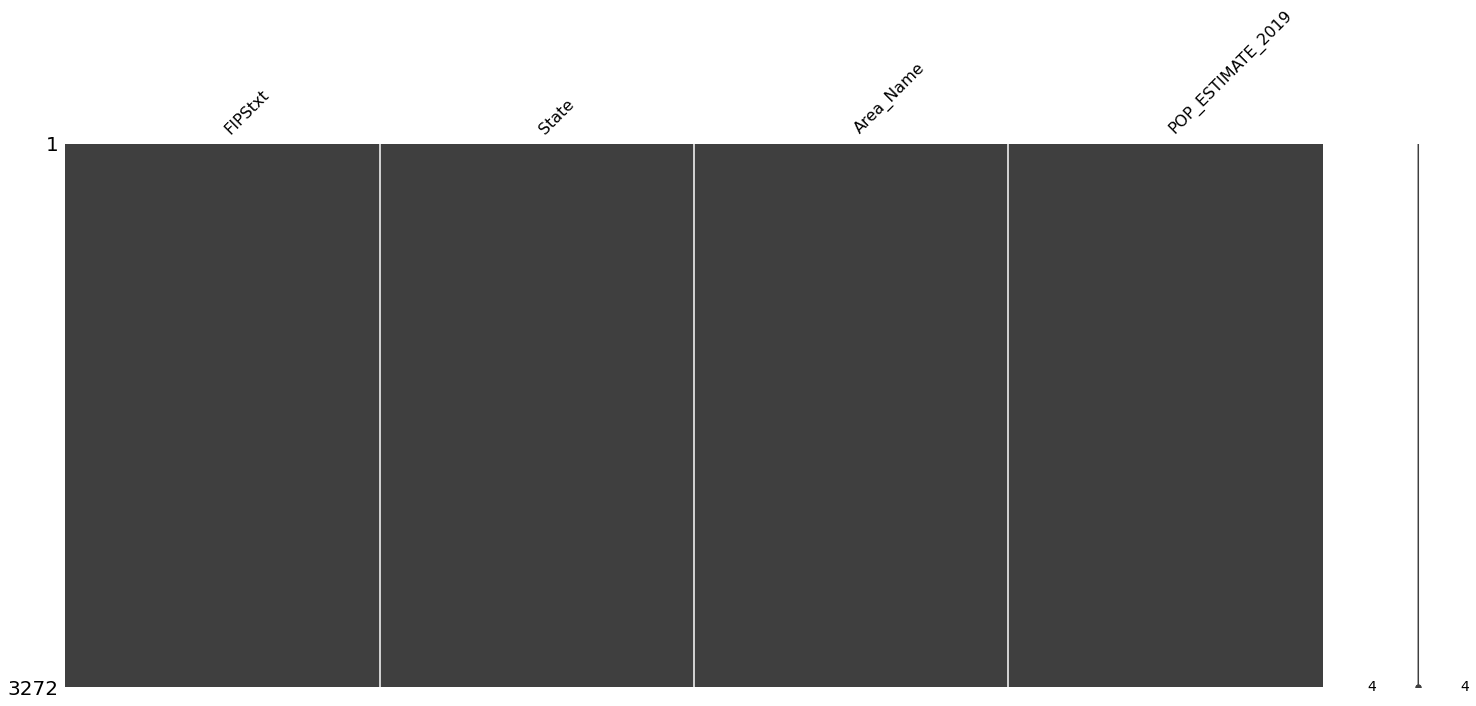

In [44]:
msno.matrix(pop_df)

No Missing Data

### 2.4 - Verify Data Types

In [45]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3272
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIPStxt            3272 non-null   int64 
 1   State              3272 non-null   object
 2   Area_Name          3272 non-null   object
 3   POP_ESTIMATE_2019  3272 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 127.8+ KB


In [46]:
pop_df.State.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

In [47]:
num_states = len(pop_df.State.unique())
num_states

52

The expected 50 states plus Puerto Rico and Washington, DC are included in the study.

## 3 - Merge County COVID and Population Data

### 3.1 - Cleanup FIPS Codes 
Compare FIPS codes before joining the dataframes to determine any anamoly.

In [48]:
# Unique FIPS codes in the Covid data for counties.
len(covid_counties_df.FIPS.unique())

3205

In [49]:
# Unique FIPS codes in the population data for counties.
len(pop_df.FIPStxt.unique())

3272

Inspect the different codes to determine if rows can be removed.

In [50]:
# FIPS codes in the Covid data but not in the population data.
no_pop_df = covid_counties_df[~covid_counties_df.FIPS.isin(pop_df.FIPStxt.values)]
no_pop_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
685,80001,Out of AL,Alabama,US,"Out of AL, Alabama, US",0,0,0.0,0.000000
929,80008,Out of CO,Colorado,US,"Out of CO, Colorado, US",0,0,0.0,0.000000
1140,80013,Out of GA,Georgia,US,"Out of GA, Georgia, US",14280,182,0.0,1.274510
1198,80015,Out of HI,Hawaii,US,"Out of HI, Hawaii, US",52,1,0.0,1.923077
1316,80017,Out of IL,Illinois,US,"Out of IL, Illinois, US",9,0,0.0,0.000000
1806,80022,Out of LA,Louisiana,US,"Out of LA, Louisiana, US",0,0,0.0,0.000000
1843,80023,Out of ME,Maine,US,"Out of ME, Maine, US",0,0,0.0,0.000000
1964,80026,Out of MI,Michigan,US,"Out of MI, Michigan, US",277,3,0.0,1.083032
2869,80040,Out of OK,Oklahoma,US,"Out of OK, Oklahoma, US",0,0,0.0,0.000000
3050,72888,Out of PR,Puerto Rico,US,"Out of PR, Puerto Rico, US",804,0,0.0,0.000000


These records represent non-county level Covid data and can be dropped.

In [51]:
# FIPS codes in the population data but not in the Covid data.
no_covid_df = pop_df[~pop_df.FIPStxt.isin(covid_counties_df.FIPS.values)]
no_covid_df

,FIPStxt,State,Area_Name,POP_ESTIMATE_2019
1,1000,AL,Alabama,4903185
69,2000,AK,Alaska,731545
79,2105,AK,Hoonah-Angoon Census Area,2148
99,4000,AZ,Arizona,7278717
115,5000,AR,Arkansas,3017804
...,...,...,...,...
3001,53000,WA,Washington,7614893
3041,54000,WV,West Virginia,1792147
3097,55000,WI,Wisconsin,5822434
3170,56000,WY,Wyoming,578759


These records represent non-county level population data and can be dropped.

### 3.2 - Merge Dataframes
Perform inner join to combine the two datafrmes eliminating both extraneous sets of data above.

In [52]:
county_df = covid_counties_df.merge(pop_df, how="inner", left_on='FIPS', right_on='FIPStxt').drop(['FIPStxt', 'Area_Name'], axis=1)
county_df

,FIPS,County,Province_State,Country_Region,Place,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,State,POP_ESTIMATE_2019
0,1001,Autauga,Alabama,US,"Autauga, Alabama, US",2030,30,3633.499794,1.477833,AL,55869
1,1003,Baldwin,Alabama,US,"Baldwin, Alabama, US",6615,69,2963.258285,1.043084,AL,223234
2,1005,Barbour,Alabama,US,"Barbour, Alabama, US",1012,9,4099.489589,0.889328,AL,24686
3,1007,Bibb,Alabama,US,"Bibb, Alabama, US",825,14,3684.022506,1.696970,AL,22394
4,1009,Blount,Alabama,US,"Blount, Alabama, US",1911,25,3304.741812,1.308216,AL,57826
...,...,...,...,...,...,...,...,...,...,...,...
3189,56037,Sweetwater,Wyoming,US,"Sweetwater, Wyoming, US",451,2,1065.111116,0.443459,WY,42343
3190,56039,Teton,Wyoming,US,"Teton, Wyoming, US",740,1,3153.767474,0.135135,WY,23464
3191,56041,Uinta,Wyoming,US,"Uinta, Wyoming, US",425,3,2101.255809,0.705882,WY,20226
3192,56043,Washakie,Wyoming,US,"Washakie, Wyoming, US",144,7,1844.971172,4.861111,WY,7805


Rename and Reorder Columns


In [53]:
county_df.rename(columns = {'Country_Region':'Country', 'POP_ESTIMATE_2019':'Population_2019'}, inplace = True)
column_order = ['FIPS','County','Province_State','State','Country','Place','Population_2019','Confirmed','Deaths','Incidence_Rate','Case-Fatality_Ratio'] 
county_df = county_df[column_order] 
county_df.head(3) 

,FIPS,County,Province_State,State,Country,Place,Population_2019,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
0,1001,Autauga,Alabama,AL,US,"Autauga, Alabama, US",55869,2030,30,3633.499794,1.477833
1,1003,Baldwin,Alabama,AL,US,"Baldwin, Alabama, US",223234,6615,69,2963.258285,1.043084
2,1005,Barbour,Alabama,AL,US,"Barbour, Alabama, US",24686,1012,9,4099.489589,0.889328


### 3.3 - Missing Data Cleanup

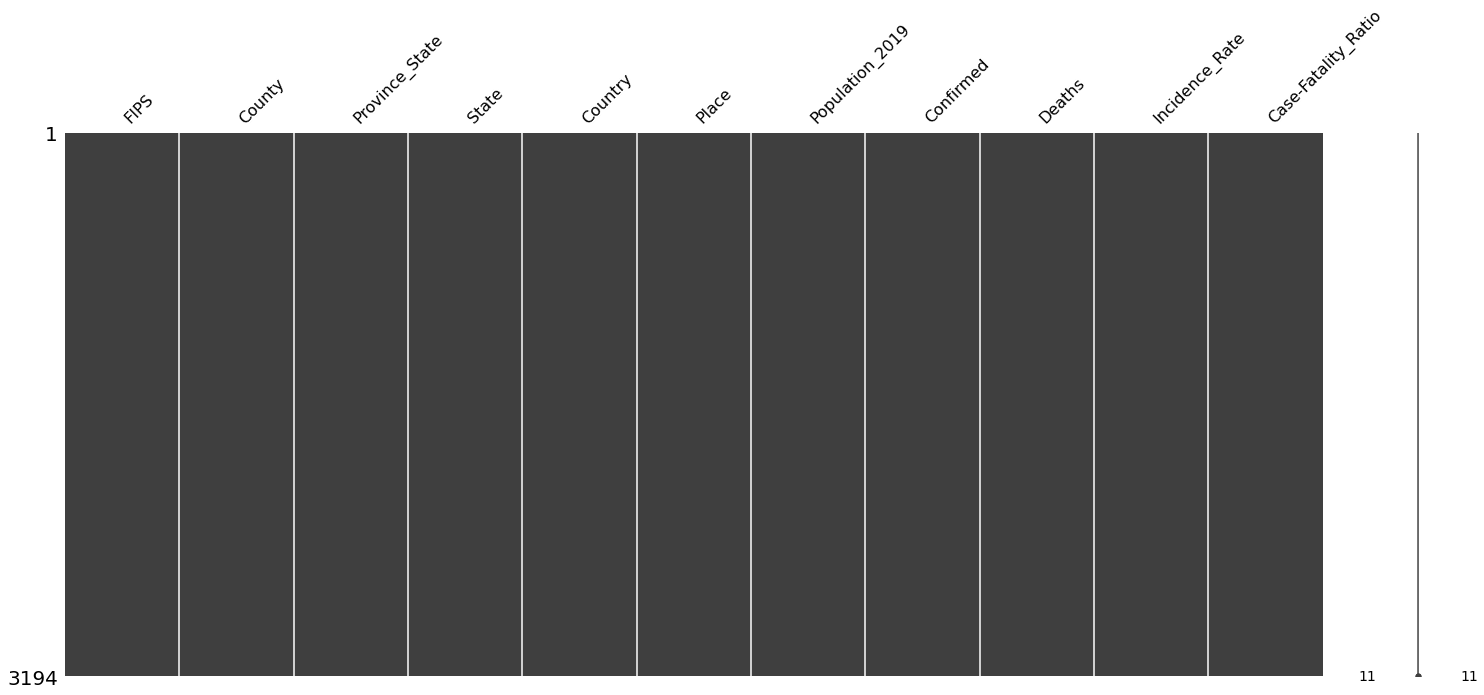

In [54]:
msno.matrix(county_df)

No missing data.

### 3.4 - Pandas Profiling Report

In [55]:
prof = ProfileReport(county_df, minimal=True)
prof.to_file(output_file="counties.html")
prof

Sample the county data.

In [56]:
county_df.sample(10)

,FIPS,County,Province_State,State,Country,Place,Population_2019,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
1868,36091,Saratoga,New York,NY,US,"Saratoga, New York, US",229863,1265,17,550.327804,1.343874
2148,40043,Dewey,Oklahoma,OK,US,"Dewey, Oklahoma, US",4891,89,1,1819.668779,1.123596
2552,47101,Lewis,Tennessee,TN,US,"Lewis, Tennessee, US",12268,375,2,3056.732964,0.533333
1284,26115,Monroe,Michigan,MI,US,"Monroe, Michigan, US",150500,1928,32,1281.063123,1.659751
1075,21169,Metcalfe,Kentucky,KY,US,"Metcalfe, Kentucky, US",10071,183,2,1817.098600,1.092896
955,20139,Osage,Kansas,KS,US,"Osage, Kansas, US",15949,156,2,978.117750,1.282051
2648,48103,Crane,Texas,TX,US,"Crane, Texas, US",4797,73,2,1521.784449,2.739726
2349,72083,Las Marias,Puerto Rico,PR,US,"Las Marias, Puerto Rico, US",7927,121,0,1224.572412,0.000000
485,13201,Miller,Georgia,GA,US,"Miller, Georgia, US",5718,306,2,5351.521511,0.653595
1392,27165,Watonwan,Minnesota,MN,US,"Watonwan, Minnesota, US",10897,576,4,5285.858493,0.694444


Sort the county data by population

In [57]:
county_df = county_df.sort_values(by='Population_2019', ascending=False)
county_df.head(10)

,FIPS,County,Province_State,State,Country,Place,Population_2019,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
203,6037,Los Angeles,California,CA,US,"Los Angeles, California, US",10039107,296821,6974,2956.647439,2.349564
608,17031,Cook,Illinois,IL,US,"Cook, Illinois, US",5150233,171437,5392,3328.723186,3.145179
2697,48201,Harris,Texas,TX,US,"Harris, Texas, US",4713325,157392,2759,3339.298690,1.752948
102,4013,Maricopa,Arizona,AZ,US,"Maricopa, Arizona, US",4485414,152695,3536,3404.256552,2.315727
221,6073,San Diego,California,CA,US,"San Diego, California, US",3338330,53928,867,1615.418488,1.607699
214,6059,Orange,California,CA,US,"Orange, California, US",3175692,58010,1440,1826.688482,2.482331
361,12086,Miami-Dade,Florida,FL,US,"Miami-Dade, Florida, US",2716940,181017,3597,6662.532113,1.987106
2653,48113,Dallas,Texas,TX,US,"Dallas, Texas, US",2635516,91664,1211,3478.028591,1.321129
1847,36047,Kings,New York,NY,US,"Kings, New York, US",2559903,74114,7381,2895.187825,9.958982
217,6065,Riverside,California,CA,US,"Riverside, California, US",2470546,65757,1279,2661.638358,1.945040


---
## 4 - Read Land Area Data

In [58]:
!wget https://www2.census.gov/library/publications/2011/compendia/usa-counties/excel/LND01.xls

--2020-10-25 02:11:24--  https://www2.census.gov/library/publications/2011/compendia/usa-counties/excel/LND01.xls
Resolving www2.census.gov (www2.census.gov)... 23.198.24.18, 2a02:26f0:b200:1be::208c, 2a02:26f0:b200:1a4::208c
Connecting to www2.census.gov (www2.census.gov)|23.198.24.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.ms-excel]
Saving to: ‘LND01.xls.4’

LND01.xls.4             [ <=>                ]   1.50M  --.-KB/s    in 0.1s    

2020-10-25 02:11:24 (10.9 MB/s) - ‘LND01.xls.4’ saved [1567744]



### 4.1 - Cleanup Columns

In [59]:
# STCOU - FIPS code for state or county
# Areaname - County and State
# LND110210D - Land area in square miles, 2010 SQM
columns_of_interest = ['Areaname','STCOU','LND110210D']
land_area_df = pd.read_excel("LND01.xls", usecols=columns_of_interest, skiprows=0)
land_area_df.head()

,Areaname,STCOU,LND110210D
0,UNITED STATES,0,3531905.43
1,ALABAMA,1000,50645.33
2,"Autauga, AL",1001,594.44
3,"Baldwin, AL",1003,1589.78
4,"Barbour, AL",1005,884.88


In [60]:
# Perform a test lookup
land_area_df[land_area_df.Areaname == 'Howard, MD']

,Areaname,STCOU,LND110210D
1227,"Howard, MD",24027,250.74


In [61]:
land_area_df.shape

(3198, 3)

In [62]:
land_area_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Areaname    3198 non-null   object 
 1   STCOU       3198 non-null   int64  
 2   LND110210D  3198 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.1+ KB


---
## 5 -  Merge Land Area and County COVID Data

### 5.1 - Cleanup FIPS Codes
Compare FIPS codes before joining the dataframes to determine any anamoly.

In [63]:
# Unique FIPS codes in the county data.
len(county_df.FIPS.unique())

3194

In [64]:
# Unique FIPS codes in the land area data for counties.
len(land_area_df.STCOU.unique())

3198

Inspect the different codes to determine if rows can be removed.

In [65]:
# FIPS codes in the County data but not in the Land Area data.
no_land_area_df = county_df[~county_df.FIPS.isin(land_area_df.STCOU.values)]
no_land_area_df.shape

(80, 11)

In [66]:
# FIPS codes in the land area data but not in the Covid data.
no_covid_df = land_area_df[~land_area_df.STCOU.isin(county_df.FIPS.values)]
no_covid_df.shape

(84, 3)

In [67]:
no_covid_df.sample(5)

,Areaname,STCOU,LND110210D
1254,MICHIGAN,26000,56538.90
2568,TEXAS,48000,261231.71
2405,SOUTH DAKOTA,46000,75811.00
2826,"Cache, UT",49005,1164.81
1862,NEW YORK,36000,47126.40


These records represent non-county or incomplete county, covid, population, or land area level data and can be dropped.

### 5.2 - Merge Dataframes
Perform inner join to combine the two datafrmes eliminating both extraneous sets of data above.

In [68]:
county_df = county_df.merge(land_area_df, how="inner", left_on='FIPS', right_on='STCOU').drop(['STCOU', 'Areaname'], axis=1)
county_df.shape

(3114, 12)

Rename Columns

In [69]:
county_df.rename(columns = {'LND110210D':'Land_Area'}, inplace = True)

In [70]:
county_df.sample(10)

,FIPS,County,Province_State,State,Country,Place,Population_2019,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,Land_Area
2458,16009,Benewah,Idaho,ID,US,"Benewah, Idaho, US",9298,169,3,1817.595182,1.775148,776.62
3041,38033,Golden Valley,North Dakota,ND,US,"Golden Valley, North Dakota, US",1761,112,0,6360.022714,0.000000,1000.79
2010,51025,Brunswick,Virginia,VA,US,"Brunswick, Virginia, US",16231,419,5,2581.479884,1.193317,566.17
793,37161,Rutherford,North Carolina,NC,US,"Rutherford, North Carolina, US",67029,1678,52,2503.394053,3.098927,564.15
2840,36041,Hamilton,New York,NY,US,"Hamilton, New York, US",4416,16,0,362.318841,0.000000,1717.37
166,48061,Cameron,Texas,TX,US,"Cameron, Texas, US",423163,23937,1075,5656.685485,4.490955,890.92
1017,8043,Fremont,Colorado,CO,US,"Fremont, Colorado, US",47839,611,1,1277.200610,0.163666,1533.07
1703,5019,Clark,Arkansas,AR,US,"Clark, Arkansas, US",22320,484,4,2168.458781,0.826446,866.07
991,28105,Oktibbeha,Mississippi,MS,US,"Oktibbeha, Mississippi, US",49587,2008,54,4049.448444,2.689243,458.20
450,13097,Douglas,Georgia,GA,US,"Douglas, Georgia, US",146343,4039,72,2759.954354,1.782619,200.07


### 5.3 - Missing Data Cleanup

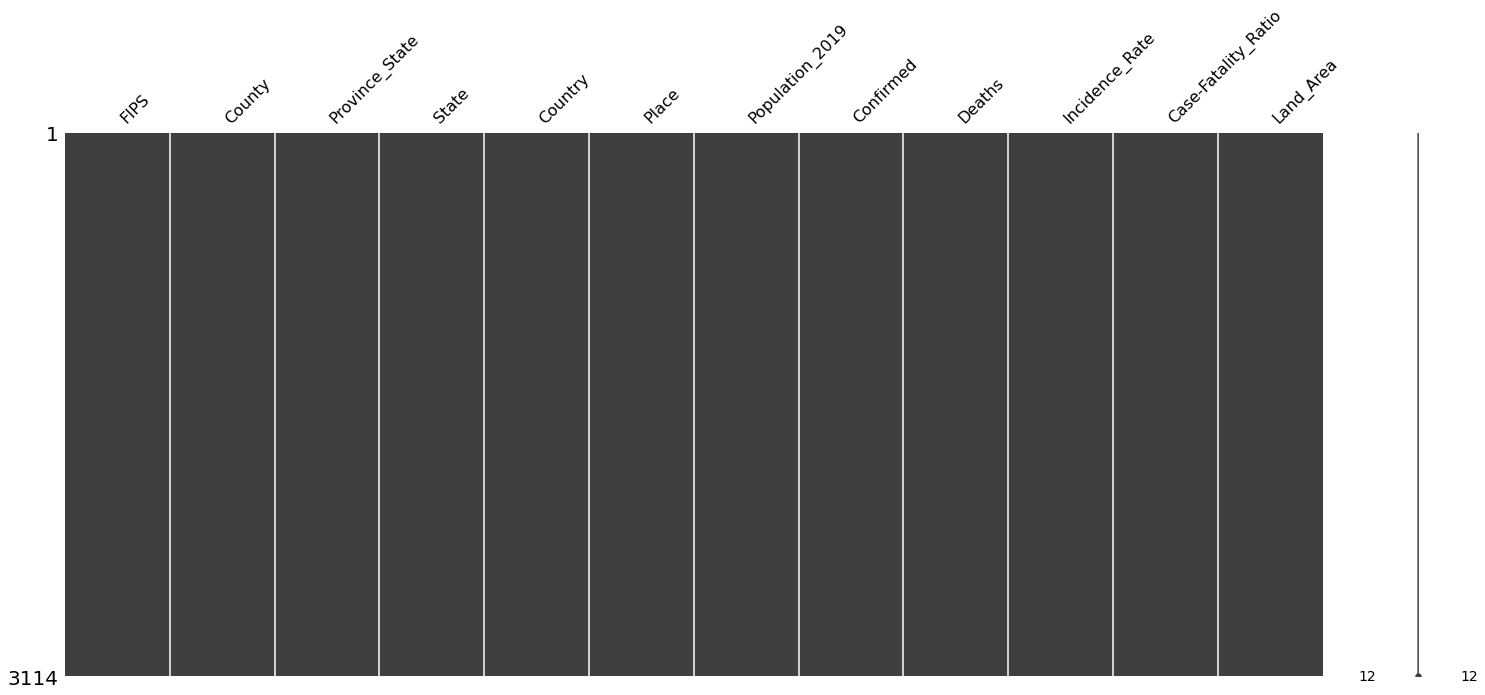

In [71]:
msno.matrix(county_df)

No missing data.

### 5.4 - Function: ratio
Used to calculate ratios for the study such as:
- Population per square mile 
- Confirmed COVID cases per square mile
- COVID deaths per square mile

In [72]:
def ratio(x, y):

    # Return ratio as an integer.
    return int(x / y)

Test the ```ratio``` function

In [73]:
# pop_square_mile test (example - more population than square mileage)
ratio(10039107, 4057.88)

2473

In [74]:
# pop_square_mile test (example - more square mileage than population)
ratio(169, 668.93) 

0

### 5.5 - Add Square Mileage Ratio Columns
Apply the ```ratio``` function to add the following columns to each county record:
- Population per Square Mile
- Confirmed COVID Cases per Square Mile
- COVID Deaths per Square Mile

In [75]:
county_df["Pop_Sq_Mile"] = county_df[["Population_2019", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df["Confirmed_Sq_Mile"] = county_df[["Confirmed", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df["Deaths_Sq_Mile"] = county_df[["Deaths", "Land_Area"]].apply(lambda x: ratio(*x), axis=1)
county_df.head()

,FIPS,County,Province_State,State,Country,Place,Population_2019,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,Land_Area,Pop_Sq_Mile,Confirmed_Sq_Mile,Deaths_Sq_Mile
0,6037,Los Angeles,California,CA,US,"Los Angeles, California, US",10039107,296821,6974,2956.647439,2.349564,4057.88,2473,73,1
1,17031,Cook,Illinois,IL,US,"Cook, Illinois, US",5150233,171437,5392,3328.723186,3.145179,945.33,5448,181,5
2,48201,Harris,Texas,TX,US,"Harris, Texas, US",4713325,157392,2759,3339.298690,1.752948,1703.48,2766,92,1
3,4013,Maricopa,Arizona,AZ,US,"Maricopa, Arizona, US",4485414,152695,3536,3404.256552,2.315727,9200.14,487,16,0
4,6073,San Diego,California,CA,US,"San Diego, California, US",3338330,53928,867,1615.418488,1.607699,4206.63,793,12,0


Create a "Display Name" field representing the county and state abreviaiton to use in charting labels

In [76]:
def place(county, state):
    return county + ', ' + state

In [77]:
county_df["Display_Name"] = county_df[["County", "State"]].apply(lambda x: place(*x), axis=1)

In [78]:
county_df.head(3)

,FIPS,County,Province_State,State,Country,Place,Population_2019,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,Land_Area,Pop_Sq_Mile,Confirmed_Sq_Mile,Deaths_Sq_Mile,Display_Name
0,6037,Los Angeles,California,CA,US,"Los Angeles, California, US",10039107,296821,6974,2956.647439,2.349564,4057.88,2473,73,1,"Los Angeles, CA"
1,17031,Cook,Illinois,IL,US,"Cook, Illinois, US",5150233,171437,5392,3328.723186,3.145179,945.33,5448,181,5,"Cook, IL"
2,48201,Harris,Texas,TX,US,"Harris, Texas, US",4713325,157392,2759,3339.298690,1.752948,1703.48,2766,92,1,"Harris, TX"


Reorder columns


In [79]:
county_df = county_df[['FIPS','County','State','Display_Name','Land_Area',
                       'Population_2019','Pop_Sq_Mile',
                       'Confirmed','Confirmed_Sq_Mile',
                       'Deaths','Deaths_Sq_Mile',
                       'Incidence_Rate','Case-Fatality_Ratio']]
county_df.sample(5)

,FIPS,County,State,Display_Name,Land_Area,Population_2019,Pop_Sq_Mile,Confirmed,Confirmed_Sq_Mile,Deaths,Deaths_Sq_Mile,Incidence_Rate,Case-Fatality_Ratio
1020,36023,Cortland,NY,"Cortland, NY",498.76,47581,95,488,0,0,0,1025.619470,0.000000
3002,48125,Dickens,TX,"Dickens, TX",901.72,2211,2,51,0,2,0,2306.648575,3.921569
473,55073,Marathon,WI,"Marathon, WI",1544.98,135692,87,4011,2,45,0,2955.959084,1.121915
1029,37013,Beaufort,NC,"Beaufort, NC",827.19,46994,56,1298,1,39,0,2762.054730,3.004622
352,55087,Outagamie,WI,"Outagamie, WI",637.52,187885,294,8472,13,60,0,4509.141230,0.708215


---
## 6 - Charting Functions

### 6.1 - Function: scatter_plot

In [80]:
def scatter_plot(x_list, y_list, x_label, y_label, suptitle, title):

    assert len(x_list) == len(y_list) # verify lists are of eaual length

    plt.figure(figsize=(14, 8))  # in inches   
    plt.xlabel('\n'+ x_label, fontsize=16)
    plt.ylabel(y_label + '\n', fontsize=16)
    plt.suptitle(suptitle, fontsize=20, va='bottom')
    plt.title(title  + '\n', fontsize=18, va='center')
    plt.ticklabel_format(style='plain')

    plt.scatter(x_list, y_list, alpha=1., c="blue", edgecolors='none')

    plt.show()

### 6.2 - Function: scatter_plot_with_labels

- Ref: https://www.tutorialexample.com/python-matplotlib-implement-a-scatter-plot-with-labels-a-completed-guide-matplotlib-tutorial/

In [81]:
def scatter_plot_with_labels(x_list, y_list, annotaton_labels, x_label, y_label, suptitle, title):

    assert len(x_list) == len(y_list) == len(annotation_labels) # verify all lists are of eaual length

    plt.figure(figsize=(14, 8))  # in inches   
    plt.xlabel('\n'+ x_label, fontsize=16)
    plt.ylabel(y_label + '\n', fontsize=16)
    plt.suptitle(suptitle, fontsize=20, va='bottom')
    plt.title(title  + '\n', fontsize=18, va='center')
    plt.ticklabel_format(style='plain')

    for i, label in enumerate(annotation_labels): # get (0, label)
        x = x_list[i]
        y = y_list[i] 
        plt.scatter(x, y, c='blue')         
        plt.annotate(label,
                     xy=(x, y), # show point 
                     xytext=(0, 4), # show annotate
                     textcoords='offset points',
                     ha='center',
                     va='bottom',
                     fontsize=10)

    plt.show()

# Part II - Questions

## Q1 - What counties in the US are the most populated?

### Q1.1 - Identify Top 10 Most Populated Counties

In [118]:
most_populated_df = county_df.sort_values(by='Population_2019',ascending=False).head(15) 
most_pop_df = most_populated_df[['Display_Name','Population_2019']]
most_pop_df

,Display_Name,Population_2019
0,"Los Angeles, CA",10039107
1,"Cook, IL",5150233
2,"Harris, TX",4713325
3,"Maricopa, AZ",4485414
4,"San Diego, CA",3338330
5,"Orange, CA",3175692
6,"Miami-Dade, FL",2716940
7,"Dallas, TX",2635516
8,"Kings, NY",2559903
9,"Riverside, CA",2470546


Show the top 15 Most Populated Counties in a bar chart.

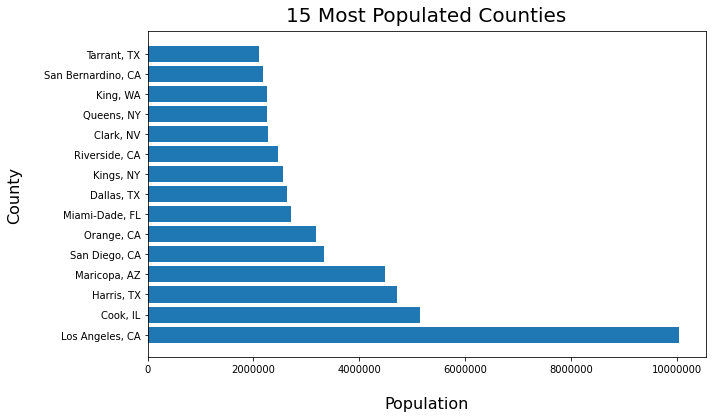

In [127]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xlabel('\n'+'Population', fontsize=16)
plt.ylabel('County' + '\n', fontsize=16)
plt.title('15 Most Populated Counties', fontsize=20, va='bottom')
plt.barh(most_pop_df['Display_Name'], most_pop_df['Population_2019'])
plt.show()

### 1.3 - Histograms of County Populations

Show histogram of all county populations

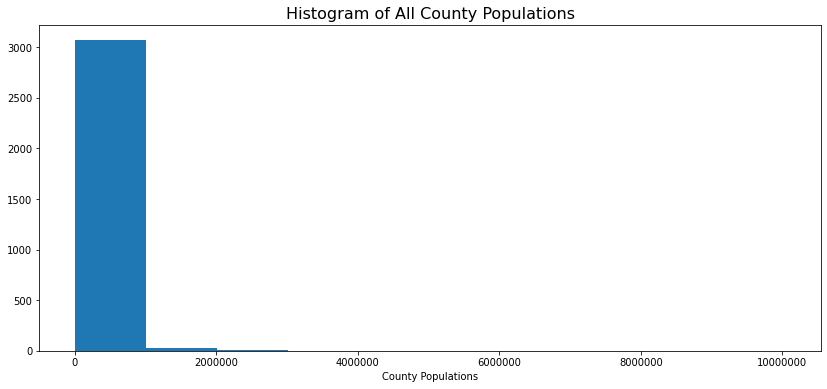

In [83]:
plt.figure(figsize=(14, 6))
plt.hist(list(county_df.Population_2019), bins=10)
plt.ticklabel_format(style='plain')
plt.title('Histogram of All County Populations', fontsize=16)
plt.xlabel('County Populations')
plt.show()

This chart isn't useful because the majority of counties have populations below 1 million people.  
So, rechart two histograms dividing the data at the 1 million population mark.

Show histogram for County Populations of 1 Million or more people

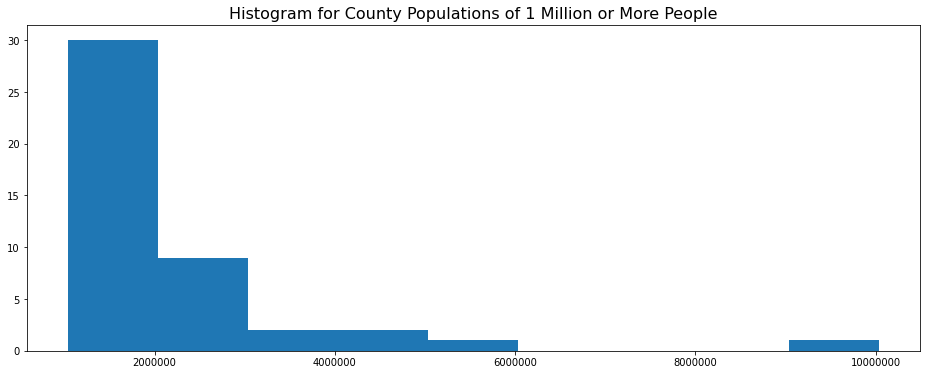

In [84]:
pop_over_1M = county_df[county_df['Population_2019'] >= 1000000]
plt.figure(figsize=(16, 6))
plt.hist(list(pop_over_1M.Population_2019), bins=9)
plt.title('Histogram for County Populations of 1 Million or More People', fontsize=16)
plt.ticklabel_format(style='plain')
plt.show()

This chart shows that 30 counties have between 1 million and 2 million people and about half that many have more thn 2 million people.

Now, show histogram bins for counties with population under 1 Million

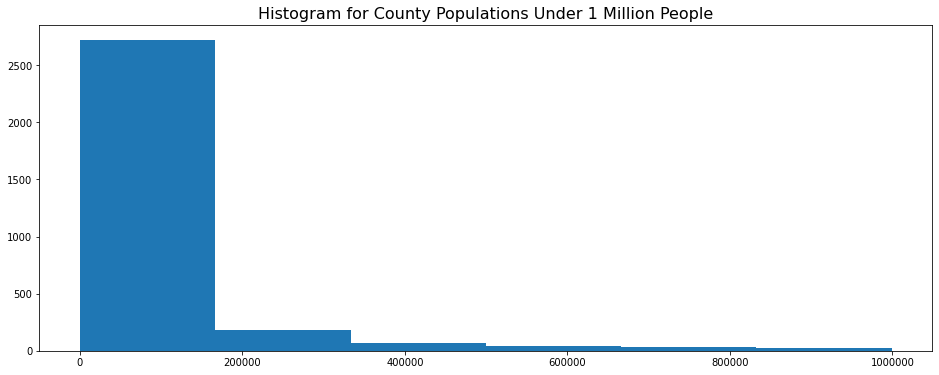

In [85]:
pop_under_1M = county_df[county_df['Population_2019'] < 1000000]
plt.figure(figsize=(16, 6))
plt.hist(list(pop_under_1M.Population_2019), bins=6)
plt.title('Histogram for County Populations Under 1 Million People', fontsize=16)
plt.ticklabel_format(style='plain')
plt.show()

This chart shows over 2500 of the counties in the study have less than 200K people.  

Now, show histogram bins for counties with population under 200 Thousand People

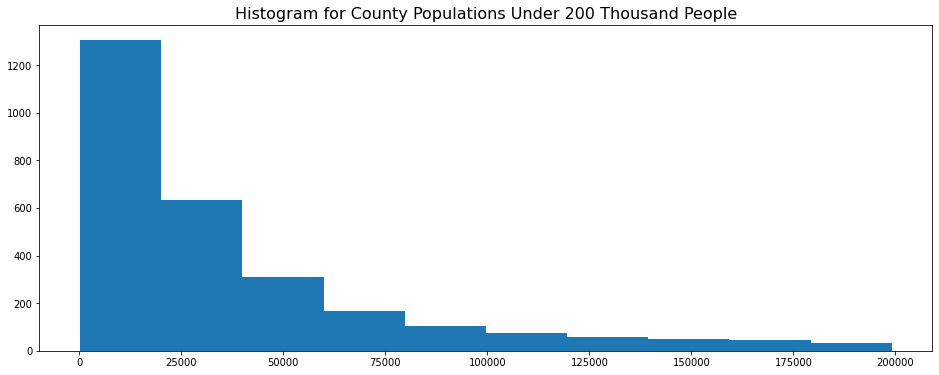

In [86]:
pop_under_200K = county_df[county_df['Population_2019'] < 200000]
plt.figure(figsize=(16, 6))
plt.hist(list(pop_under_200K.Population_2019), bins=10)
plt.title('Histogram for County Populations Under 200 Thousand People', fontsize=16)
plt.ticklabel_format(style='plain')
plt.show()

So, this chart shows a good distribution of the less populated counties.  Given there are slightly over 3100 counties in the study, this chart shows that more than a third of them have population with less than 25K people.

Some of these counties may surface later in the analysis based on their population density.

## Q2 - What counties in the US are the most densely populated?

### Q2.1 - Identify Most Densely Populated Counties
Determined by sorting the county dataframe by population per square mile in descending order and saving the top 15 county records. 

In [131]:
most_densely_populated_df = county_df.sort_values(by='Pop_Sq_Mile',ascending=False).head(15) 
most_dense_df = most_densely_populated_df[['Display_Name','Pop_Sq_Mile']]
most_dense_df

,Display_Name,Pop_Sq_Mile
20,"New York, NY",71340
8,"Kings, NY",36146
27,"Bronx, NY",33686
11,"Queens, NY",20767
64,"San Francisco, CA",18808
99,"Hudson, NJ",14557
78,"Suffolk, MA",13824
22,"Philadelphia, PA",11812
93,"District of Columbia, DC",11560
414,"Alexandria, VA",10607


Show the top 15 Most Densely Populated Counties in a bar chart.

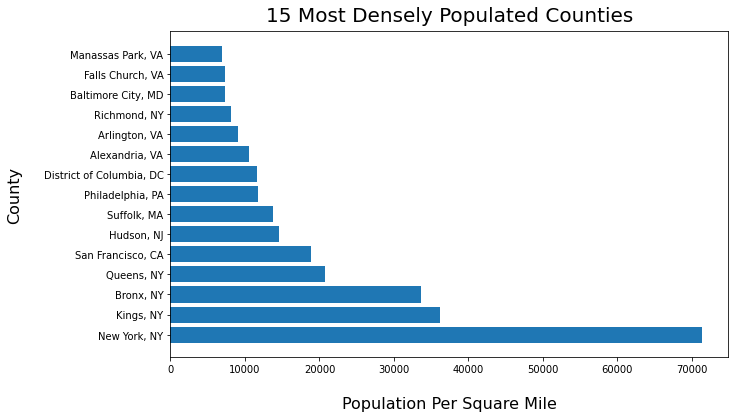

In [133]:
plt.figure(figsize=(10, 6))
#plt.ticklabel_format(style='plain')
plt.xlabel('\n'+'Population Per Square Mile', fontsize=16)
plt.ylabel('County' + '\n', fontsize=16)
plt.title('15 Most Densely Populated Counties', fontsize=20, va='bottom')
plt.barh(most_dense_df['Display_Name'], most_dense_df['Pop_Sq_Mile'])
plt.show()

### Q2.2 - Show scatter plot of County Popluation Densities

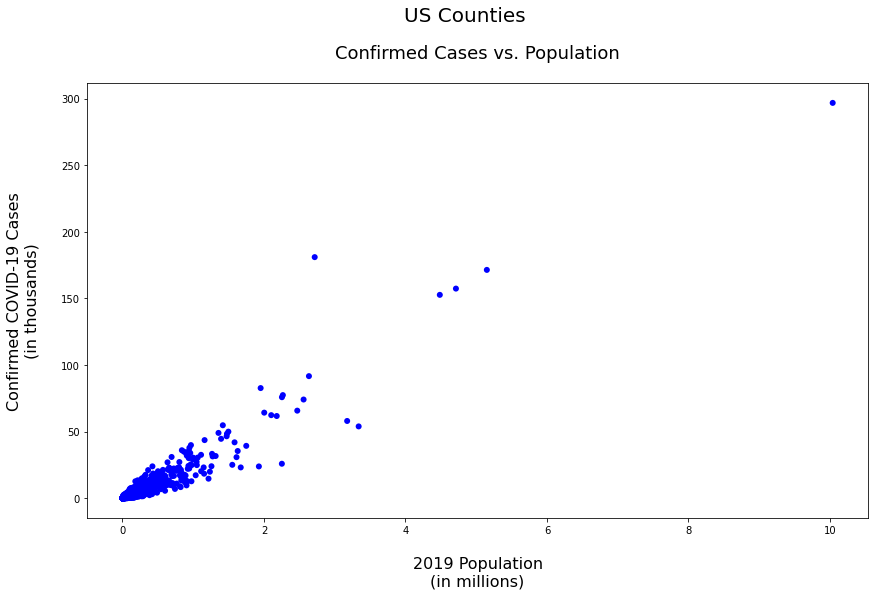

In [ ]:
top_n = county_df.shape[0]

# Set titles
suptitle = 'US Counties'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019.head(top_n))]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(county_df.Confirmed.head(top_n))]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Show the scatter plot
scatter_plot(x_list, y_list, x_label, y_label, suptitle, title)

Data is bunched in lower left corner, so see if histogram charts give a better characterization of the data.

## Q3 - What counties in the US have the most confirmed cases of COVID-19?

### Q3.1 - Identify Counties with Highest Confirmed COVID Cases
Determined by sorting the county dataframe by confirmed cases per square mile in descending order and saving the top 15 county records. 

In [89]:
highest_case_rate_by_density_df = county_df.sort_values(by='Confirmed_Sq_Mile',ascending=False).head(15)
highest_case_rate_by_density_df.head(10)

,FIPS,County,State,Display_Name,Population_2019,Land_Area,Pop_Sq_Mile,Confirmed,Confirmed_Sq_Mile,Deaths,Deaths_Sq_Mile,Incidence_Rate,Case-Fatality_Ratio
20,36061,New York,NY,"New York, NY",1628706,22.83,71340,35459,1553,3192,139,2177.127118,9.001946
27,36005,Bronx,NY,"Bronx, NY",1418207,42.10,33686,54792,1301,4985,118,3863.469860,9.098044
8,36047,Kings,NY,"Kings, NY",2559903,70.82,36146,74114,1046,7381,104,2895.187825,9.958982
11,36081,Queens,NY,"Queens, NY",2253858,108.53,20767,75853,698,7290,67,3365.473779,9.610694
99,34017,Hudson,NJ,"Hudson, NJ",672391,46.19,14557,22236,481,1525,33,3307.004407,6.858248
78,25025,Suffolk,MA,"Suffolk, MA",803907,58.15,13824,27180,467,1168,20,3380.988099,4.297277
22,42101,Philadelphia,PA,"Philadelphia, PA",1584064,134.10,11812,41972,312,1853,13,2649.640419,4.414848
146,36085,Richmond,NY,"Richmond, NY",476143,58.37,8157,16929,290,1094,18,3555.444478,6.462284
414,51510,Alexandria,VA,"Alexandria, VA",159428,15.03,10607,4179,278,75,4,2621.245954,1.794688
93,11001,District of Columbia,DC,"District of Columbia, DC",705749,61.05,11560,16609,272,642,10,2353.386261,3.865374


### Q3.2 - Scatter plot of Confirmed Cases Versus County Popluations

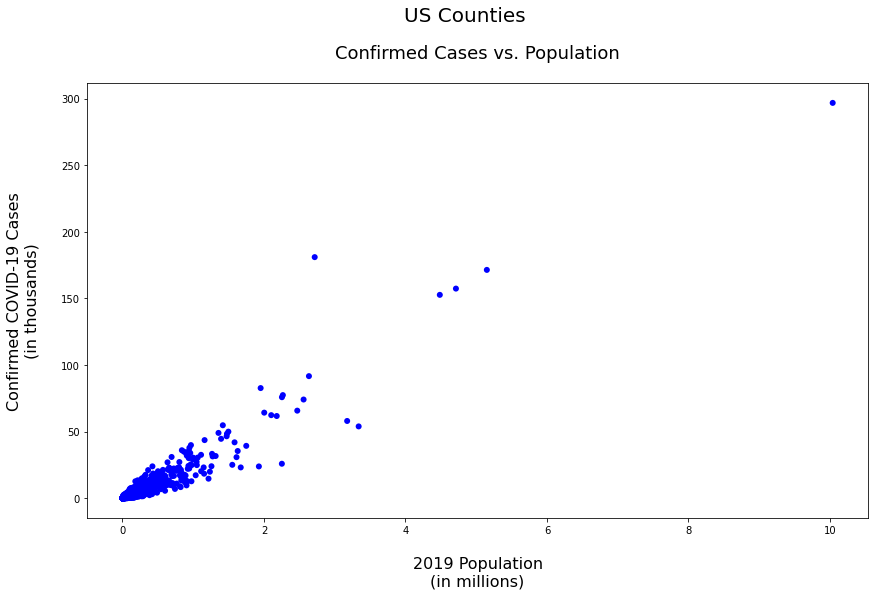

In [82]:
top_n = county_df.shape[0]

# Set titles
suptitle = 'US Counties'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019.head(top_n))]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
y_list = [y / 1000 for y in list(county_df.Confirmed.head(top_n))]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Show the scatter plot
scatter_plot(x_list, y_list, x_label, y_label, suptitle, title)

Data is bunched in lower left corner, so see if histogram charts give a better characterization of the data.

### Q3.3 - Confirmed Cases Per Square Mile Versus Population Per Square Mile

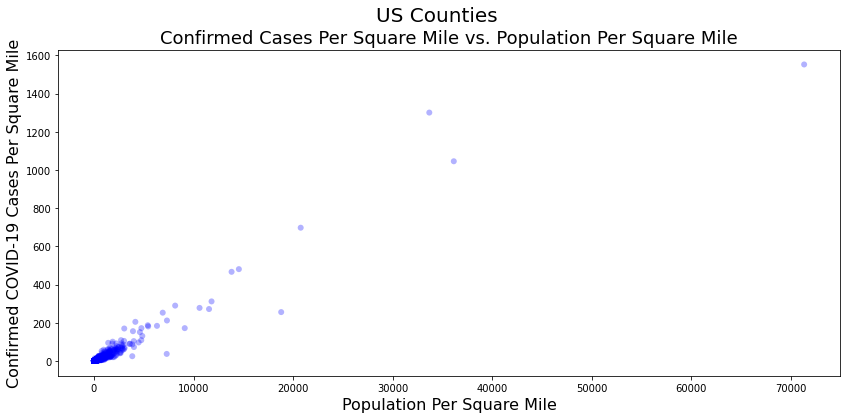

In [90]:
# Create plot
fig = plt.figure(figsize=(14,6))
#ax = plt.gca()
plt.scatter(county_df.Pop_Sq_Mile, county_df.Confirmed_Sq_Mile , alpha=0.3, c="blue", edgecolors='none')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Population Per Square Mile',fontsize=16)
plt.ylabel('Confirmed COVID-19 Cases Per Square Mile',fontsize=16)
plt.title('Confirmed Cases Per Square Mile vs. Population Per Square Mile',fontsize=18)
plt.suptitle('US Counties',fontsize=20)
#plt.legend(loc=2)#
plt.show()

In [134]:
#county_df.hist(figsize=(14,10))

In [135]:
#county_df['Land_Area'].hist()

### Show a scatter plot of confirmed cases for the top 10 most populated US counties

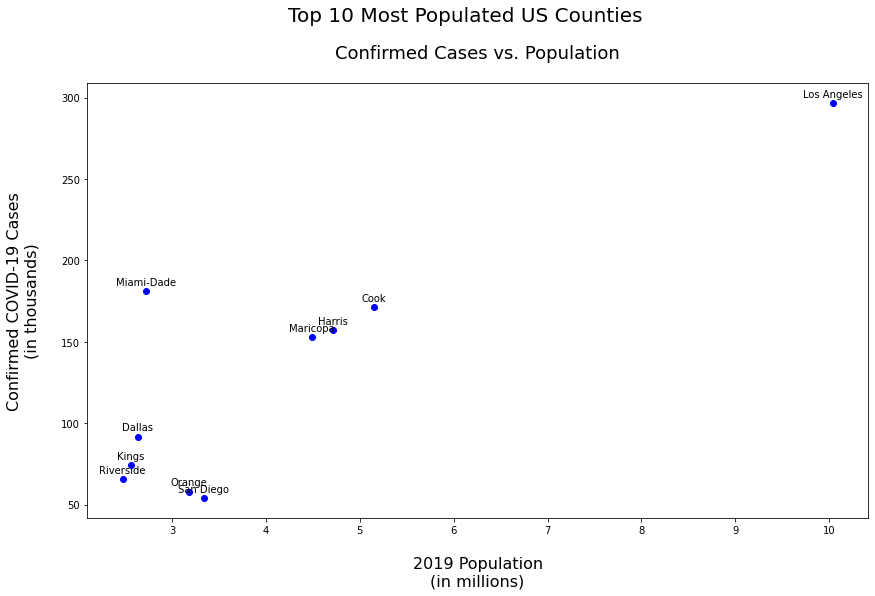

In [93]:
top_n = 10

# Set titles
suptitle = 'Top 10 Most Populated US Counties'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019.head(top_n))]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(county_df.Confirmed.head(top_n))]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Set annotations
annotation_labels = county_df.County.head(top_n)

# Show the scatter plot
scatter_plot_with_labels(x_list, y_list, annotation_labels, x_label, y_label, suptitle, title)

Repeat without Outlier (Los Angeles) since its population skews the chart

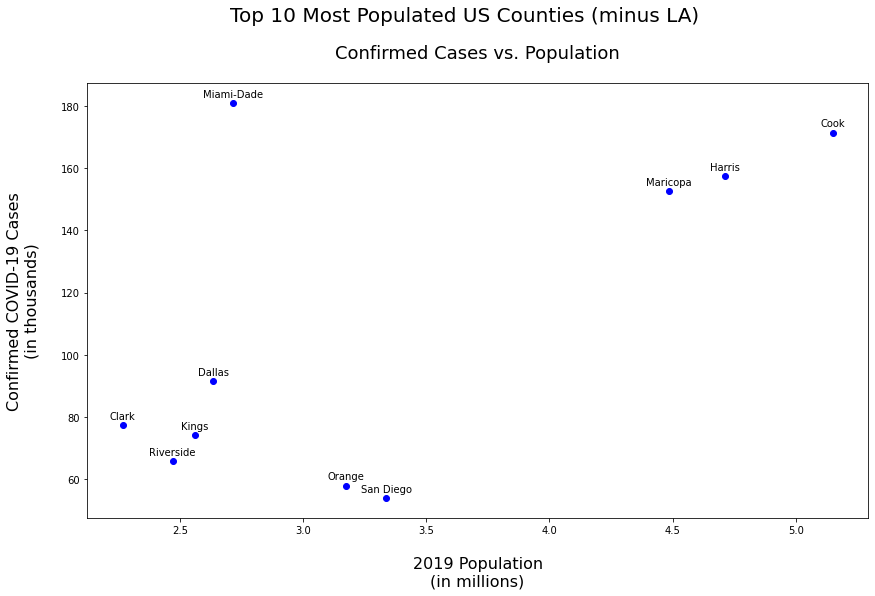

In [94]:
top_n = 10

# Set titles
suptitle = 'Top 10 Most Populated US Counties (minus LA)'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019[1:top_n+1])]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(county_df.Confirmed[1:top_n+1])]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Set annotations
annotation_labels = county_df.County[1:top_n+1]

# Show the scatter plot
scatter_plot_with_labels(x_list, y_list, annotation_labels, x_label, y_label, suptitle, title)

Show this chart again using the '''plotyly''' package to show dynamic labels.

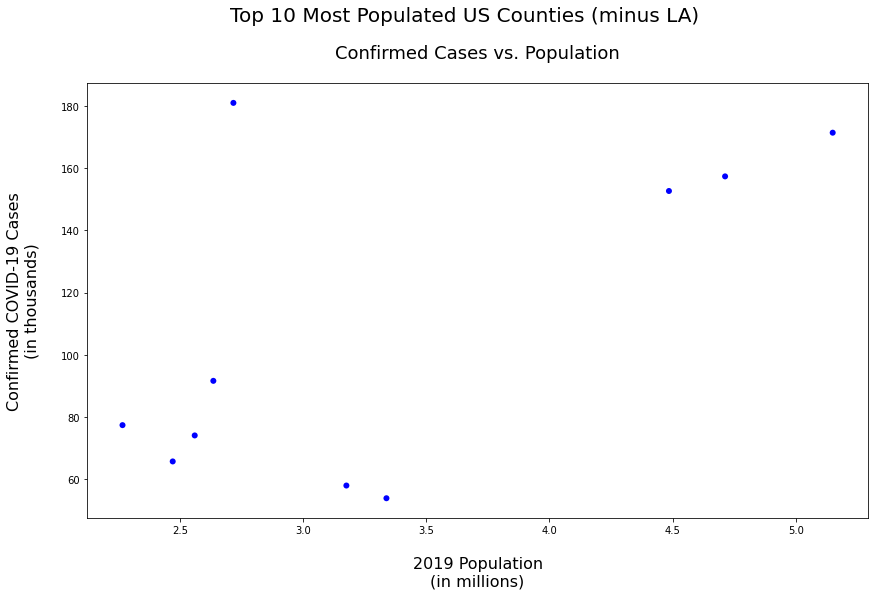

In [95]:
top_n = 10

# Set titles
suptitle = 'Top 10 Most Populated US Counties (minus LA)'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(county_df.Population_2019[1:top_n+1])]

# Set list of Confirmed Cases in thousands
y_list = [y / 1000 for y in list(county_df.Confirmed[1:top_n+1])]

pd.options.plotting.backend = "plotly"

plt.figure(figsize=(14, 8))  # in inches   
plt.xlabel('\n'+ '2019 Population' + '\n' + '(in millions)', fontsize=16)
plt.ylabel('Confirmed COVID-19 Cases' + '\n' + '(in thousands)' + '\n', fontsize=16)
plt.suptitle(suptitle, fontsize=20, va='bottom')
plt.title(title  + '\n', fontsize=18, va='center')
plt.ticklabel_format(style='plain')

plt.scatter(x_list, y_list, alpha=1., c="blue", edgecolors='none')

plt.show()

***NOTE: ```plotly``` dynamic behavior doesn't seem to be working in Google Colab environment.***

Reset default to ```matplotlib```

## Q4 - Are the most densely populated counties the ones with the highest case counts? If not, which ones?

### New York
New York is known to have had the worst outbreak early on, so take a look at its most populated counties.

In [102]:
ny_top10_df = county_df[county_df.State=='NY'].head(10)
ny_top10_df

,FIPS,County,State,Display_Name,Population_2019,Land_Area,Pop_Sq_Mile,Confirmed,Confirmed_Sq_Mile,Deaths,Deaths_Sq_Mile,Incidence_Rate,Case-Fatality_Ratio
8,36047,Kings,NY,"Kings, NY",2559903,70.82,36146,74114,1046,7381,104,2895.187825,9.958982
11,36081,Queens,NY,"Queens, NY",2253858,108.53,20767,75853,698,7290,67,3365.473779,9.610694
20,36061,New York,NY,"New York, NY",1628706,22.83,71340,35459,1553,3192,139,2177.127118,9.001946
25,36103,Suffolk,NY,"Suffolk, NY",1476601,912.05,1618,48399,53,2019,2,3277.730409,4.171574
27,36005,Bronx,NY,"Bronx, NY",1418207,42.10,33686,54792,1301,4985,118,3863.469860,9.098044
29,36059,Nassau,NY,"Nassau, NY",1356924,284.72,4765,49042,172,2208,7,3614.203891,4.502263
49,36119,Westchester,NY,"Westchester, NY",967506,430.50,2247,39890,92,1470,3,4122.971847,3.685134
58,36029,Erie,NY,"Erie, NY",918702,1042.69,881,12705,12,713,0,1382.929394,5.611964
88,36055,Monroe,NY,"Monroe, NY",741770,657.21,1128,6992,10,300,0,942.610243,4.290618
146,36085,Richmond,NY,"Richmond, NY",476143,58.37,8157,16929,290,1094,18,3555.444478,6.462284


#### Show a scatter plot of confirmed cases for the top 10 most populated NY counties 

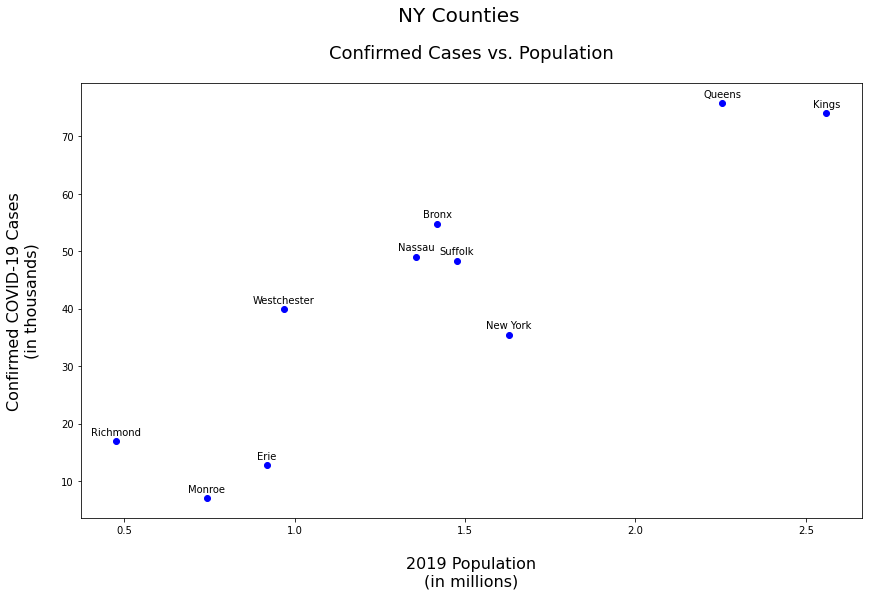

In [103]:
# Set titles
suptitle = 'NY Counties'
title = 'Confirmed Cases vs. Population'

# Set list of Populations in millions
x_list = [x / 1000000 for x in list(ny_top10_df.Population_2019)]
x_label = '2019 Population' + '\n' + '(in millions)'

# Set list of Confirmed Cases in thousands
# y_list = list(ny_top10_df.Confirmed)
y_list = [y / 1000 for y in list(ny_top10_df.Confirmed)]
y_label = 'Confirmed COVID-19 Cases' + '\n' + '(in thousands)'

# Set annotations
annotation_labels = ny_top10_df.County

# Show the scatter plot
scatter_plot_with_labels(x_list, y_list, annotation_labels, x_label, y_label, suptitle, title)

In [96]:
pd.options.plotting.backend = "matplotlib"

## Q5 - How do case counts in densely populated counties compare to counts in counties with the highest rates of cases per million people? Is there a correlation?

# COMPLETE

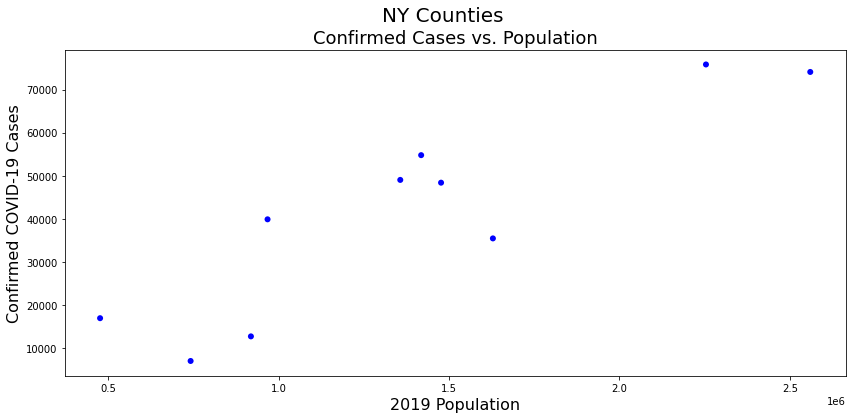

In [99]:
# Create plot
fig = plt.figure(figsize=(14,6))
#ax = plt.gca()
plt.scatter(ny_top10_df.Population_2019, ny_top10_df.Confirmed, alpha=1.0, c="blue", edgecolors='none')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('2019 Population',fontsize=16)
plt.ylabel('Confirmed COVID-19 Cases',fontsize=16)
plt.suptitle('NY Counties',fontsize=20)
plt.title('Confirmed Cases vs. Population',fontsize=18)
plt.show()